In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'SEGMENT_ALL_CARRIER/611418118_T_T100I_SEGMENT_ALL_CARRIER.csv')

In [3]:
df.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,AIRCRAFT_TYPE,MONTH,Unnamed: 18
0,0.0,2.0,99520.0,144.0,0.0,0.0,0.0,193.0,109.0,78.0,DL,Delta Air Lines Inc.,11042,CLE,16271,YYZ,622,1,NaN
1,0.0,1.0,49760.0,72.0,44.0,0.0,0.0,214.0,90.0,38.0,DL,Delta Air Lines Inc.,11433,DTW,16271,YYZ,622,1,NaN
2,0.0,1.0,49760.0,72.0,0.0,0.0,0.0,1284.0,290.0,115.0,DL,Delta Air Lines Inc.,11618,EWR,16232,YWG,622,1,NaN
3,0.0,1.0,49760.0,72.0,40.0,0.0,0.0,348.0,84.0,61.0,DL,Delta Air Lines Inc.,11618,EWR,16271,YYZ,622,1,NaN
4,0.0,1.0,49760.0,72.0,0.0,0.0,0.0,440.0,83.0,70.0,DL,Delta Air Lines Inc.,12339,IND,16271,YYZ,622,1,NaN


In [4]:
df.shape

(15798, 19)

In [5]:
df.describe()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,AIRCRAFT_TYPE,MONTH,Unnamed: 18
count,15798.000000,15798.000000,1.579800e+04,15798.000000,15798.000000,1.579800e+04,15798.000000,15798.000000,15798.000000,15798.000000,15798.000000,15798.000000,15798.000000,15798.000000,0.0
mean,9.063109,17.214837,1.097003e+06,2799.207368,2158.752880,2.215365e+05,2179.987277,2425.492784,2495.333207,2231.150842,13162.653754,13134.128877,674.624636,1.492721,NaN
std,18.038423,22.157800,1.672872e+06,4000.169422,3169.951423,7.677678e+05,15328.004403,1964.951989,5065.924902,4686.349242,1720.442622,1734.413961,104.166075,0.499963,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,17.000000,0.000000,0.000000,10140.000000,10135.000000,40.000000,1.000000,NaN
25%,0.000000,2.000000,1.009278e+05,145.000000,72.000000,0.000000e+00,0.000000,1037.000000,0.000000,0.000000,11760.000000,11697.000000,622.000000,1.000000,NaN
50%,0.000000,9.000000,4.940650e+05,1001.000000,710.500000,0.000000e+00,0.000000,1612.500000,190.000000,158.000000,13180.000000,13162.000000,669.000000,1.000000,NaN
75%,12.000000,27.000000,1.454797e+06,4250.750000,3254.750000,1.251215e+05,0.000000,3854.000000,2368.000000,1985.000000,14312.000000,14312.000000,698.000000,2.000000,NaN
max,228.000000,294.000000,3.864960e+07,44010.000000,39716.000000,3.230241e+07,479432.000000,9100.000000,50983.000000,47543.000000,16795.000000,16782.000000,889.000000,2.000000,NaN


In [6]:
from arcgis import GIS

gis = GIS(r'http://esrifederal.maps.arcgis.com', 'james_jones_federal')

Enter password: ········


In [7]:
from arcgis.features import *

airports = gis.content.get('0cc3ab28ce7847c5b856154e9d84c687')
airports_lyr = airports.layers[0]
sdf = airports_lyr.query(where="1=1").sdf
sdf.head()

,OBJECTID,OBJECTID_1,SHAPE,continent,elevation_,gps_code,home_link,iata_code,id,ident,...,iso_region,keywords,latitude_d,local_code,longitude_,municipali,name,scheduled_,type,wikipedia_
0,1,1,"{""x"": -8341570.3489, ""y"": 4876236.196500003, ""...",NA,11,00A,,,6523,00A,...,US-PA,,40.070801,00A,-74.933601,Bensalem,Total Rf Heliport,no,heliport,
1,2,2,"{""x"": -16886721.3803, ""y"": 8388436.432499997, ...",NA,450,00AK,,,6524,00AK,...,US-AK,,59.949200,00AK,-151.695999,Anchor Point,Lowell Field,no,small_airport,
2,3,3,"{""x"": -9659225.8145, ""y"": 4145523.0812000036, ...",NA,820,00AL,,,6525,00AL,...,US-AL,,34.864799,00AL,-86.770302,Harvest,Epps Airpark,no,small_airport,
3,4,4,"{""x"": -10158448.7857, ""y"": 4246911.7918, ""spat...",NA,237,00AR,,,6526,00AR,...,US-AR,,35.608700,00AR,-91.254898,Newport,Newport Hospital & Clinic Heliport,no,heliport,
4,5,5,"{""x"": -12486150.7867, ""y"": 4069910.7205, ""spat...",NA,3810,00AZ,,,6527,00AZ,...,US-AZ,,34.305599,00AZ,-112.165001,Cordes,Cordes Airport,no,small_airport,


In [8]:
sdf.shape

(47997, 21)

In [9]:
sdf.describe()

,OBJECTID,OBJECTID_1,elevation_,id,latitude_d,longitude_
count,47997.000000,47997.000000,47997.000000,47997.000000,47997.000000,47997.000000
mean,23999.333167,23999.000000,1111.289976,47946.244724,25.297247,-39.634330
std,13856.069583,13855.684772,1525.814888,82536.604771,27.692645,77.913655
min,1.000000,1.000000,-1266.000000,2.000000,-80.318298,-179.876999
25%,12000.000000,12000.000000,110.000000,12116.000000,6.312222,-92.378304
50%,23999.000000,23999.000000,625.000000,24181.000000,36.353901,-74.332901
75%,35999.000000,35998.000000,1339.000000,38601.000000,43.770599,10.780556
max,47998.000000,47997.000000,22000.000000,318342.000000,82.517799,179.975700


In [10]:
G = nx.Graph()
mG = nx.MultiDiGraph()
edges = mG.edges(keys=True)

In [11]:
airports = {}

for row in sdf.iterrows():
    ident = row[1]['iata_code']
    lat = row[1]['latitude_d']
    long = row[1]['longitude_']
    airports[ident] = [long, lat]

In [12]:
airports['IAD']

[-77.45580292, 38.94449997]

In [15]:
airports_map = gis.map()
airports_map

MapView(layout=Layout(height='400px', width='100%'))

In [21]:
airports_map.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [20]:
airports_map.basemap = 'gray-vector'

In [16]:
sdf.head(50).spatial.plot(map_widget=airports_map)

C:\Users\jame9353\AppData\Local\conda\conda\envs\Graphs\lib\site-packages\arcgis\features\geo\_accessor.py:858: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._data[col] = self._data[col]


True

In [22]:
for row in df.iterrows():
    carrier = row[1]['UNIQUE_CARRIER_NAME']
    origin = row[1]['ORIGIN']
    destination = row[1]['DEST']
    payload = row[1]['PAYLOAD']
    passengers = row[1]['PASSENGERS']
    freight = row[1]['FREIGHT']
    mail = row[1]['MAIL']
    distance = row[1]['DISTANCE']
    travel_time = row[1]['RAMP_TO_RAMP']
    segment = (origin, destination)

    G.add_edge(origin, destination, carrier=carrier, distance=distance, travel_time=travel_time, segment=segment)
    
    mG.add_edge(origin, destination, carrier=carrier, passengers=passengers, payload=payload, 
               freight=freight, mail=mail, distance=distance, travel_time=travel_time, segment=segment)

In [23]:
print("Total number of nodes in simple graph:  " + repr(len(G.nodes)))
print("Total number of nodes in multi graph:  " + repr(len(mG.nodes)))

Total number of nodes in simple graph:  594
Total number of nodes in multi graph:  594


In [24]:
print("Total number of edges in simple graph:  " + repr(len(G.edges)))
print("Total number of edges in multi graph:  " + repr(len(mG.edges)))

Total number of edges in simple graph:  2417
Total number of edges in multi graph:  15798


In [28]:
G.nodes.data()

NodeDataView({'CLE': {}, 'YYZ': {}, 'DTW': {}, 'EWR': {}, 'YWG': {}, 'IND': {}, 'JFK': {}, 'LAX': {}, 'YVR': {}, 'MDW': {}, 'MKE': {}, 'MSP': {}, 'YEG': {}, 'PDX': {}, 'YYC': {}, 'PHL': {}, 'PIT': {}, 'PTK': {}, 'SLC': {}, 'SMF': {}, 'SNA': {}, 'YOW': {}, 'ATL': {}, 'BUF': {}, 'OKC': {}, 'BED': {}, 'PHX': {}, 'YYR': {}, 'BOS': {}, 'BNA': {}, 'IAD': {}, 'MCO': {}, 'SAT': {}, 'BDA': {}, 'CUN': {}, 'CZM': {}, 'GRU': {}, 'GYE': {}, 'MBJ': {}, 'MEX': {}, 'MVD': {}, 'PAP': {}, 'PTY': {}, 'PUJ': {}, 'SAP': {}, 'SDQ': {}, 'SJD': {}, 'STI': {}, 'AUA': {}, 'MIA': {}, 'BOG': {}, 'BWI': {}, 'MEM': {}, 'PVR': {}, 'SAL': {}, 'LIM': {}, 'MZT': {}, 'MTY': {}, 'DFW': {}, 'ONT': {}, 'RTB': {}, 'TPA': {}, 'SKB': {}, 'ZIH': {}, 'AMS': {}, 'BRU': {}, 'CDG': {}, 'FRA': {}, 'ZRH': {}, 'BCN': {}, 'SEA': {}, 'DUB': {}, 'EDI': {}, 'FCO': {}, 'CVG': {}, 'JNB': {}, 'LHR': {}, 'MXP': {}, 'TLV': {}, 'HND': {}, 'HNL': {}, 'NRT': {}, 'SPN': {}, 'PEK': {}, 'ANC': {}, 'PVG': {}, 'BFI': {}, 'YCD': {}, 'FBS': {}, 'YWH': 

In [27]:
G.edges.data()

EdgeDataView([('CLE', 'YYZ', {'carrier': 'ExpressJet Airlines Inc.', 'distance': 193.0, 'travel_time': 73.0, 'segment': ('YYZ', 'CLE')}), ('CLE', 'MAD', {'carrier': 'VistaJet Limited', 'distance': 3946.0, 'travel_time': 0.0, 'segment': ('MAD', 'CLE')}), ('CLE', 'PUJ', {'carrier': 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern', 'distance': 1764.0, 'travel_time': 1588.0, 'segment': ('PUJ', 'CLE')}), ('CLE', 'KEF', {'carrier': 'Gainjet Aviation SA', 'distance': 2791.0, 'travel_time': 0.0, 'segment': ('KEF', 'CLE')}), ('CLE', 'TLC', {'carrier': 'Gulf And Caribbean Cargo', 'distance': 1844.0, 'travel_time': 498.0, 'segment': ('CLE', 'TLC')}), ('CLE', 'YOW', {'carrier': 'SkyWest Airlines Inc.', 'distance': 412.0, 'travel_time': 209.0, 'segment': ('YOW', 'CLE')}), ('CLE', 'YUL', {'carrier': 'ExpressJet Airlines Inc.', 'distance': 495.0, 'travel_time': 154.0, 'segment': ('YUL', 'CLE')}), ('CLE', 'CUN', {'carrier': 'Frontier Airlines Inc.', 'distance': 1434.0, 'travel_time': 3820.0, 'se

In [29]:
for node in G.nodes.data():
    if node[0] in airports:
        shape = airports[node[0]]
        node[1]['long'] = shape[0]
        node[1]['lat'] = shape[1]

In [30]:
for node in mG.nodes.data():
    if node[0] in airports:
        shape = airports[node[0]]
        node[1]['long'] = shape[0]
        node[1]['lat'] = shape[1]

In [31]:
G.nodes.data()

NodeDataView({'CLE': {'long': -81.8498001099, 'lat': 41.4117012024}, 'YYZ': {'long': -79.6305999756, 'lat': 43.6772003174}, 'DTW': {'long': -83.3534011841, 'lat': 42.2123985291}, 'EWR': {'long': -74.1687011719, 'lat': 40.6925010681}, 'YWG': {'long': -97.2398986816, 'lat': 49.9099998474}, 'IND': {'long': -86.2944030762, 'lat': 39.717300415}, 'JFK': {'long': -73.77890015, 'lat': 40.63980103}, 'LAX': {'long': -118.4079971, 'lat': 33.94250107}, 'YVR': {'long': -123.183998108, 'lat': 49.193901062}, 'MDW': {'long': -87.7524032593, 'lat': 41.7859992981}, 'MKE': {'long': -87.8965988159, 'lat': 42.9472007751}, 'MSP': {'long': -93.2218017578, 'lat': 44.8819999695}, 'YEG': {'long': -113.580001831, 'lat': 53.3097000122}, 'PDX': {'long': -122.5979996, 'lat': 45.58869934}, 'YYC': {'long': -114.019996643, 'lat': 51.113899231}, 'PHL': {'long': -75.2410964966, 'lat': 39.8718986511}, 'PIT': {'long': -80.23290253, 'lat': 40.49150085}, 'PTK': {'long': -83.4200973511, 'lat': 42.6655006409}, 'SLC': {'long':

In [32]:
# Calculate Graph Density
graph_density = nx.density(G)
multigraph_density = nx.density(mG)
print("Simple graph density:  " + repr(graph_density))
print("Multi graph density:  " + repr(multigraph_density))

Simple graph density:  0.013723519625711868
Multi graph density:  0.04484984754799257


In [33]:
graph_info = nx.info(G)
print("Simple Graph Information")
print(graph_info)

Simple Graph Information
Name: 
Type: Graph
Number of nodes: 594
Number of edges: 2417
Average degree:   8.1380


In [34]:
graph_info = nx.info(mG)
print("MultiGraph Information")
print(graph_info)

MultiGraph Information
Name: 
Type: MultiDiGraph
Number of nodes: 594
Number of edges: 15798
Average in degree:  26.5960
Average out degree:  26.5960


In [35]:
# Calculate number of components
simple_components = nx.number_connected_components(G)
print("Number of connected components:  " + repr(simple_components))

Number of connected components:  5


In [36]:
#  Compute Degree Centrality
degree = dict(mG.degree())
nx.set_node_attributes(mG, name='degree', values=degree)

degree_s = dict(G.degree())
nx.set_node_attributes(G, name='degree', values=degree)

In [37]:
#  Compute In-Degree/Out-Degree Centrality
in_degree = dict(nx.in_degree_centrality(mG))
out_degree = dict(nx.out_degree_centrality(mG))
nx.set_node_attributes(mG, name='in degree', values=in_degree)
nx.set_node_attributes(mG, name='out degree', values=out_degree)

In [38]:
#  Compute Closeness Centrality
closeness = dict(nx.closeness_centrality(mG))
nx.set_node_attributes(mG, name='closeness', values=closeness)

closeness_s = dict(nx.closeness_centrality(G))
nx.set_node_attributes(G, name='closeness', values=closeness_s)

In [39]:
#  Compute Betweenness Centrality for nodes and edges
node_betweenness = dict(nx.betweenness_centrality(mG))
nx.set_node_attributes(mG, name='betweenness', values=node_betweenness)

node_betweenness_s = dict(nx.betweenness_centrality(G))
nx.set_node_attributes(G, name='betweenness', values=node_betweenness_s)

edge_betweenness_s = dict(nx.edge_betweenness_centrality(G))
nx.set_edge_attributes(G, name='betweenness', values=edge_betweenness_s)

In [40]:
# Compute Pagerank for the graph
simple_pagerank = dict(nx.pagerank(G, alpha=0.9))
nx.set_node_attributes(G, name='pagerank', values=simple_pagerank)

In [42]:
# View Information about an Individual Node
nodes_list = dict(G.nodes.data())
nodes_list['RDU']

{'long': -78.7874984741,
 'lat': 35.8776016235,
 'degree': 29,
 'closeness': 0.3295966843381719,
 'betweenness': 0.00042020418311841613,
 'pagerank': 0.0014890946980880726}

In [43]:
# Examine all of the neighbors of a node
charlotte_neighbors = nx.all_neighbors(G, 'CLT')
print(list(charlotte_neighbors))

['PTY', 'AUA', 'YUL', 'YYZ', 'MUC', 'YXU', 'GCM', 'BCN', 'FRA', 'LHR', 'LIR', 'SJD', 'SKB', 'CUN', 'BZE', 'CZM', 'FPO', 'PLS', 'POP', 'NAS', 'PUJ', 'UVF', 'GGT', 'ANU', 'BGI', 'CUR', 'MBJ', 'MEX', 'SJO', 'HAV']


In [44]:
# Examine all of the neighbors of a node
rdu_neighbors = nx.all_neighbors(G, 'RDU')
print(list(rdu_neighbors))

['YOW', 'YYC', 'YYZ', 'YUL', 'LIR', 'CUN', 'CDG', 'LHR']


In [45]:
# Find common neighbors between two nodes
common_neighbors = nx.common_neighbors(G, 'CLT', 'IAD')
print(list(common_neighbors))

['PTY', 'AUA', 'YUL', 'YYZ', 'MUC', 'GCM', 'FRA', 'LHR', 'LIR', 'SJD', 'SKB', 'CUN', 'PLS', 'NAS', 'PUJ', 'MBJ', 'MEX', 'SJO']


In [46]:
# Returns all nodes that are not immediately connected to a node
miami_non_neighbors = nx.non_neighbors(G, 'MIA')
print(list(miami_non_neighbors))

['CLE', 'DTW', 'EWR', 'IND', 'JFK', 'LAX', 'YVR', 'MDW', 'MKE', 'MSP', 'YEG', 'PDX', 'YYC', 'PHL', 'PIT', 'PTK', 'SLC', 'SMF', 'SNA', 'ATL', 'BUF', 'OKC', 'BED', 'PHX', 'YYR', 'BOS', 'BNA', 'IAD', 'MCO', 'SAT', 'SJD', 'BWI', 'MEM', 'MZT', 'DFW', 'ONT', 'TPA', 'ZIH', 'SEA', 'EDI', 'CVG', 'JNB', 'HND', 'HNL', 'NRT', 'SPN', 'PEK', 'ANC', 'PVG', 'BFI', 'YCD', 'FBS', 'YWH', 'LKE', 'YYJ', 'KEH', 'HKG', 'ICN', 'LEJ', 'SNN', 'LCK', 'WUH', 'IAH', 'ORD', 'OST', 'ZAZ', 'LRD', 'HMO', 'ELP', 'SHV', 'TLC', 'YIP', 'YYT', 'BJX', 'GSO', 'GSP', 'JZT', 'MCI', 'MQY', 'YQG', 'SDF', 'FAB', 'SAV', 'GVA', 'FGI', 'PPG', 'TBU', 'GUM', 'NGO', 'PUS', 'GYD', 'LBA', 'MAN', 'BGR', 'BSL', 'BRN', 'JED', 'RUH', 'OPO', 'FLL', 'YQB', 'PIE', 'ORF', 'SJU', 'BOI', 'LAR', 'COS', 'STR', 'DOV', 'LGG', 'OKO', 'SUU', 'RSW', 'UAM', 'OSN', 'YHZ', 'CHS', 'MAJ', 'ROR', 'TKK', 'PNI', 'AUS', 'CLT', 'MSY', 'SFO', 'MNL', 'KIX', 'PSP', 'LBG', 'SCF', 'EMA', 'SVG', 'CPS', 'DAL', 'DEN', 'EGE', 'LAS', 'LGA', 'PBI', 'YYB', 'RDU', 'SJC', 'CAN'

In [47]:
# Determines if there is a path between two nodes
iad_has_path = nx.has_path(G, 'IAD', 'MIA')
iad_has_path

True

In [48]:
# Find the Shortest Path between two nodes based on travel time
shortest_path_tt = list(nx.shortest_path(mG, 'IAD', 'MIA', travel_time))
shortest_path_tt

['IAD', 'YUL', 'MIA']

In [49]:
# Determines the Chain Decomposition for the Graph
chain = list(nx.chain_decomposition(G, root='IAD'))
long_chain = [c for c in chain if len(c) > 2]
long_chain

[[('IAD', 'LIM'),
  ('LIM', 'MCO'),
  ('MCO', 'GRU'),
  ('GRU', 'DTW'),
  ('DTW', 'CDG'),
  ('CDG', 'EWR'),
  ('EWR', 'YWG'),
  ('YWG', 'MSP'),
  ('MSP', 'YEG'),
  ('YEG', 'LAS'),
  ('LAS', 'YQR'),
  ('YQR', 'CPR'),
  ('CPR', 'YLW'),
  ('YLW', 'MCI'),
  ('MCI', 'SLW'),
  ('SLW', 'SHV'),
  ('SHV', 'TLC'),
  ('TLC', 'YIP'),
  ('YIP', 'YXU'),
  ('YXU', 'LRD'),
  ('LRD', 'GDL'),
  ('GDL', 'PDX'),
  ('PDX', 'YYC'),
  ('YYC', 'LAX'),
  ('LAX', 'YVR'),
  ('YVR', 'DEN'),
  ('DEN', 'YUL'),
  ('YUL', 'CLT'),
  ('CLT', 'PTY'),
  ('PTY', 'IAH'),
  ('IAH', 'IST'),
  ('IST', 'ORD'),
  ('ORD', 'DUB'),
  ('DUB', 'SWF'),
  ('SWF', 'YYR'),
  ('YYR', 'BOS'),
  ('BOS', 'YQB'),
  ('YQB', 'FLL'),
  ('FLL', 'YOW'),
  ('YOW', 'ATL'),
  ('ATL', 'BDA'),
  ('BDA', 'JFK'),
  ('JFK', 'AUA'),
  ('AUA', 'MIA'),
  ('MIA', 'MAD'),
  ('MAD', 'CLE'),
  ('CLE', 'YYZ'),
  ('YYZ', 'IAD')],
 [('IAD', 'ARN'),
  ('ARN', 'OAK'),
  ('OAK', 'BCN'),
  ('BCN', 'SEA'),
  ('SEA', 'YYJ'),
  ('YYJ', 'PSP'),
  ('PSP', 'YCD'),
  ('YCD',

In [50]:
# Find any bridges in the graph
bridges = list(nx.bridges(G))
bridges

[('YYZ', 'LAR'),
 ('YYZ', 'GRK'),
 ('YYZ', 'INT'),
 ('YYZ', 'APF'),
 ('YYZ', 'BLM'),
 ('YYZ', 'CHA'),
 ('YYZ', 'LEB'),
 ('YYZ', 'LWB'),
 ('YYZ', 'PAH'),
 ('YYZ', 'UST'),
 ('YYZ', 'MKC'),
 ('YYZ', 'MDT'),
 ('YYZ', 'ACY'),
 ('YYZ', 'AGS'),
 ('YYZ', 'ERI'),
 ('YYZ', 'FCM'),
 ('YYZ', 'MSN'),
 ('YYZ', 'MSO'),
 ('YYZ', 'RST'),
 ('YYZ', 'AVP'),
 ('EWR', 'LBA'),
 ('EWR', 'BOM'),
 ('EWR', 'AMD'),
 ('YWG', 'DLH'),
 ('JFK', 'ZAZ'),
 ('JFK', 'RIX'),
 ('JFK', 'LCY'),
 ('JFK', 'FOC'),
 ('JFK', 'ALG'),
 ('JFK', 'KBP'),
 ('JFK', 'BEG'),
 ('JFK', 'CAI'),
 ('LAX', 'TNA'),
 ('LAX', 'XMN'),
 ('LAX', 'RAR'),
 ('LAX', 'UPN'),
 ('LAX', 'LTO'),
 ('LAX', 'VVO'),
 ('LAX', 'CSX'),
 ('LAX', 'TLS'),
 ('LAX', 'NKG'),
 ('LAX', 'VRN'),
 ('YVR', 'SBA'),
 ('YVR', 'SUN'),
 ('YVR', 'LIH'),
 ('YEG', 'CID'),
 ('YEG', 'OLM'),
 ('PDX', 'OAI'),
 ('YYC', 'PSC'),
 ('PHL', 'NUE'),
 ('PTK', 'KLV'),
 ('PTK', 'YMM'),
 ('YOW', 'ABE'),
 ('ATL', 'PKC'),
 ('ATL', 'LOS'),
 ('PHX', 'CUL'),
 ('YYR', 'UXP'),
 ('YYR', 'CWA'),
 ('BOS', 'PDL'

In [51]:
cliques = list(nx.find_cliques(G))
large_cliques = [clique for clique in cliques if len(clique) >= 2]
large_cliques

[['BGR', 'BRN'],
 ['BGR', 'STN'],
 ['BGR', 'AMS'],
 ['BGR', 'LHR'],
 ['BGR', 'LBG'],
 ['BGR', 'BQH'],
 ['BGR', 'BSL'],
 ['BGR', 'MAN'],
 ['BGR', 'SNN'],
 ['BGR', 'BLK'],
 ['BGR', 'MAD'],
 ['BGR', 'ZRH'],
 ['BGR', 'KEF'],
 ['BGR', 'MTY'],
 ['EGE', 'YYZ'],
 ['EGE', 'VKO'],
 ['PSE', 'HOW'],
 ['PDL', 'BOS'],
 ['SNA', 'SJD'],
 ['SNA', 'PVR'],
 ['SNA', 'YVR'],
 ['PDX', 'MEX'],
 ['PDX', 'GDL'],
 ['PDX', 'OAI'],
 ['PDX', 'NRT'],
 ['PDX', 'AMS'],
 ['PDX', 'HKG'],
 ['PDX', 'YYZ'],
 ['PDX', 'YYC'],
 ['PDX', 'SJD'],
 ['PDX', 'YVR'],
 ['PDX', 'PVR'],
 ['PDX', 'KEF'],
 ['SZX', 'LAX'],
 ['SZX', 'ANC'],
 ['SZX', 'SEA'],
 ['UXP', 'YYR'],
 ['BTR', 'NAS'],
 ['YAM', 'HPN'],
 ['YLW', 'GCC'],
 ['YLW', 'MCI'],
 ['YLW', 'MWH'],
 ['YLW', 'JAC'],
 ['YLW', 'PHX'],
 ['YLW', 'GEG'],
 ['YLW', 'SEA'],
 ['YLW', 'CPR'],
 ['YLW', 'LAX'],
 ['YLW', 'ASE'],
 ['OPO', 'EWR'],
 ['OPO', 'JFK'],
 ['OPO', 'IAD'],
 ['MYR', 'YMX'],
 ['MYR', 'YTZ'],
 ['CSL', 'SFO'],
 ['CSL', 'BUR'],
 ['CLE', 'YUL'],
 ['CLE', 'CUN'],
 ['CLE', 'YOW'

In [52]:
dulles_ego = nx.ego_graph(mG, 'IAD')

In [53]:
pos = nx.spring_layout(dulles_ego)

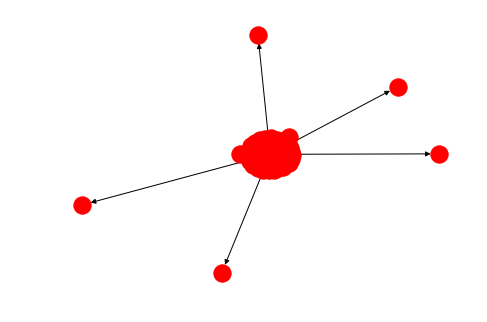

In [54]:
nx.draw(dulles_ego)

In [ ]:
nodes_df = pd.DataFrame.from_dict(dict(G.nodes.data()), orient='index')
nodes_df.head()

In [55]:
G.edges

EdgeView([('CLE', 'YYZ'), ('CLE', 'MAD'), ('CLE', 'PUJ'), ('CLE', 'KEF'), ('CLE', 'TLC'), ('CLE', 'YOW'), ('CLE', 'YUL'), ('CLE', 'CUN'), ('YYZ', 'DTW'), ('YYZ', 'EWR'), ('YYZ', 'IND'), ('YYZ', 'JFK'), ('YYZ', 'MDW'), ('YYZ', 'MKE'), ('YYZ', 'MSP'), ('YYZ', 'PHL'), ('YYZ', 'PIT'), ('YYZ', 'PTK'), ('YYZ', 'BNA'), ('YYZ', 'BUF'), ('YYZ', 'IAD'), ('YYZ', 'MCO'), ('YYZ', 'SAT'), ('YYZ', 'SLC'), ('YYZ', 'FLL'), ('YYZ', 'PIE'), ('YYZ', 'LAR'), ('YYZ', 'IAH'), ('YYZ', 'BOS'), ('YYZ', 'DAL'), ('YYZ', 'DEN'), ('YYZ', 'DFW'), ('YYZ', 'EGE'), ('YYZ', 'LAX'), ('YYZ', 'LGA'), ('YYZ', 'MIA'), ('YYZ', 'ORD'), ('YYZ', 'PBI'), ('YYZ', 'RSW'), ('YYZ', 'SEA'), ('YYZ', 'SFO'), ('YYZ', 'HNL'), ('YYZ', 'LAS'), ('YYZ', 'PHX'), ('YYZ', 'PSP'), ('YYZ', 'SAN'), ('YYZ', 'SRQ'), ('YYZ', 'TPA'), ('YYZ', 'ONT'), ('YYZ', 'TEB'), ('YYZ', 'BDL'), ('YYZ', 'CMH'), ('YYZ', 'GRK'), ('YYZ', 'INT'), ('YYZ', 'RDU'), ('YYZ', 'RIC'), ('YYZ', 'APF'), ('YYZ', 'BLM'), ('YYZ', 'CHA'), ('YYZ', 'FRG'), ('YYZ', 'FXE'), ('YYZ', 'GRB')

In [56]:
flights_edges = pd.DataFrame.from_dict(dict(G.edges), orient='index')
flights_edges.head()

carrier  distance  \
AEX SLU  Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...    2327.0   
AGU AMA                                          Envoy Air     931.0   
ALB LGW                          Norwegian Air Shuttle ASA    3382.0   
AMS BGR                             American Airlines Inc.    3267.0   
    CVG                            Singapore Airlines Ltd.    4142.0   

         travel_time     segment  betweenness  
AEX SLU        318.0  (SLU, AEX)     0.000967  
AGU AMA        183.0  (AGU, AMA)     0.000933  
ALB LGW          0.0  (LGW, ALB)     0.000682  
AMS BGR       1985.0  (AMS, BGR)     0.002300  
    CVG          0.0  (CVG, AMS)     0.000657

In [57]:
flight_edges = []
for row in flights_edges.iterrows():
    if row[0][0] in airports and row[0][1] in airports:
        polyline = [airports[row[0][0]], airports[row[0][1]]]
        iRow = [(row[0][0], row[0][1]),polyline]
        flight_edges.append(iRow)
segments = pd.DataFrame(flight_edges, columns=['Segment', 'shape'])
segments.head()

,Segment,shape
0,"(AEX, SLU)","[[-92.5497970581, 31.3274002075], [-60.992901,..."
1,"(AGU, AMA)","[[-102.318000793, 21.7056007385], [-101.706001..."
2,"(ALB, LGW)","[[-73.8016967773, 42.748298645], [-0.190277993..."
3,"(AMS, BGR)","[[4.76388978958, 52.3086013794], [-68.82810211..."
4,"(AMS, CVG)","[[4.76388978958, 52.3086013794], [-84.66780090..."


In [58]:
edges_geo = pd.merge(flights_edges, segments, left_on='segment', right_on='Segment')
edges_geo.head()

,carrier,distance,travel_time,segment,betweenness,Segment,shape
0,Envoy Air,931.0,183.0,"(AGU, AMA)",0.000933,"(AGU, AMA)","[[-102.318000793, 21.7056007385], [-101.706001..."
1,American Airlines Inc.,3267.0,1985.0,"(AMS, BGR)",0.002300,"(AMS, BGR)","[[4.76388978958, 52.3086013794], [-68.82810211..."
2,Volga-Dnepr Airlines,4856.0,0.0,"(ANC, KHH)",0.003310,"(ANC, KHH)","[[-149.996002197, 61.1744003296], [120.3499984..."
3,Federal Express Corporation,3680.0,11408.0,"(ANC, KIX)",0.000459,"(ANC, KIX)","[[-149.996002197, 61.1744003296], [135.2440032..."
4,National Air Cargo Group Inc d/ba National Air...,3978.0,498.0,"(ANC, KOJ)",0.003310,"(ANC, KOJ)","[[-149.996002197, 61.1744003296], [130.7189941..."


In [59]:
edges_df = edges_geo[['carrier','distance', 'travel_time', 'segment', 'betweenness', 'shape']]
edges_df.head()

,carrier,distance,travel_time,segment,betweenness,shape
0,Envoy Air,931.0,183.0,"(AGU, AMA)",0.000933,"[[-102.318000793, 21.7056007385], [-101.706001..."
1,American Airlines Inc.,3267.0,1985.0,"(AMS, BGR)",0.002300,"[[4.76388978958, 52.3086013794], [-68.82810211..."
2,Volga-Dnepr Airlines,4856.0,0.0,"(ANC, KHH)",0.003310,"[[-149.996002197, 61.1744003296], [120.3499984..."
3,Federal Express Corporation,3680.0,11408.0,"(ANC, KIX)",0.000459,"[[-149.996002197, 61.1744003296], [135.2440032..."
4,National Air Cargo Group Inc d/ba National Air...,3978.0,498.0,"(ANC, KOJ)",0.003310,"[[-149.996002197, 61.1744003296], [130.7189941..."


In [60]:
edges_df.to_csv('Shapefiles/edges.csv')
nodes_df.to_csv("Shapefiles/nodes.csv")

NameError: name 'nodes_df' is not defined